<a href="https://colab.research.google.com/github/ANACERMIR/Capstone_Project_G13/blob/main/models/Yolo/Yolov8_Navantia_baseline_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

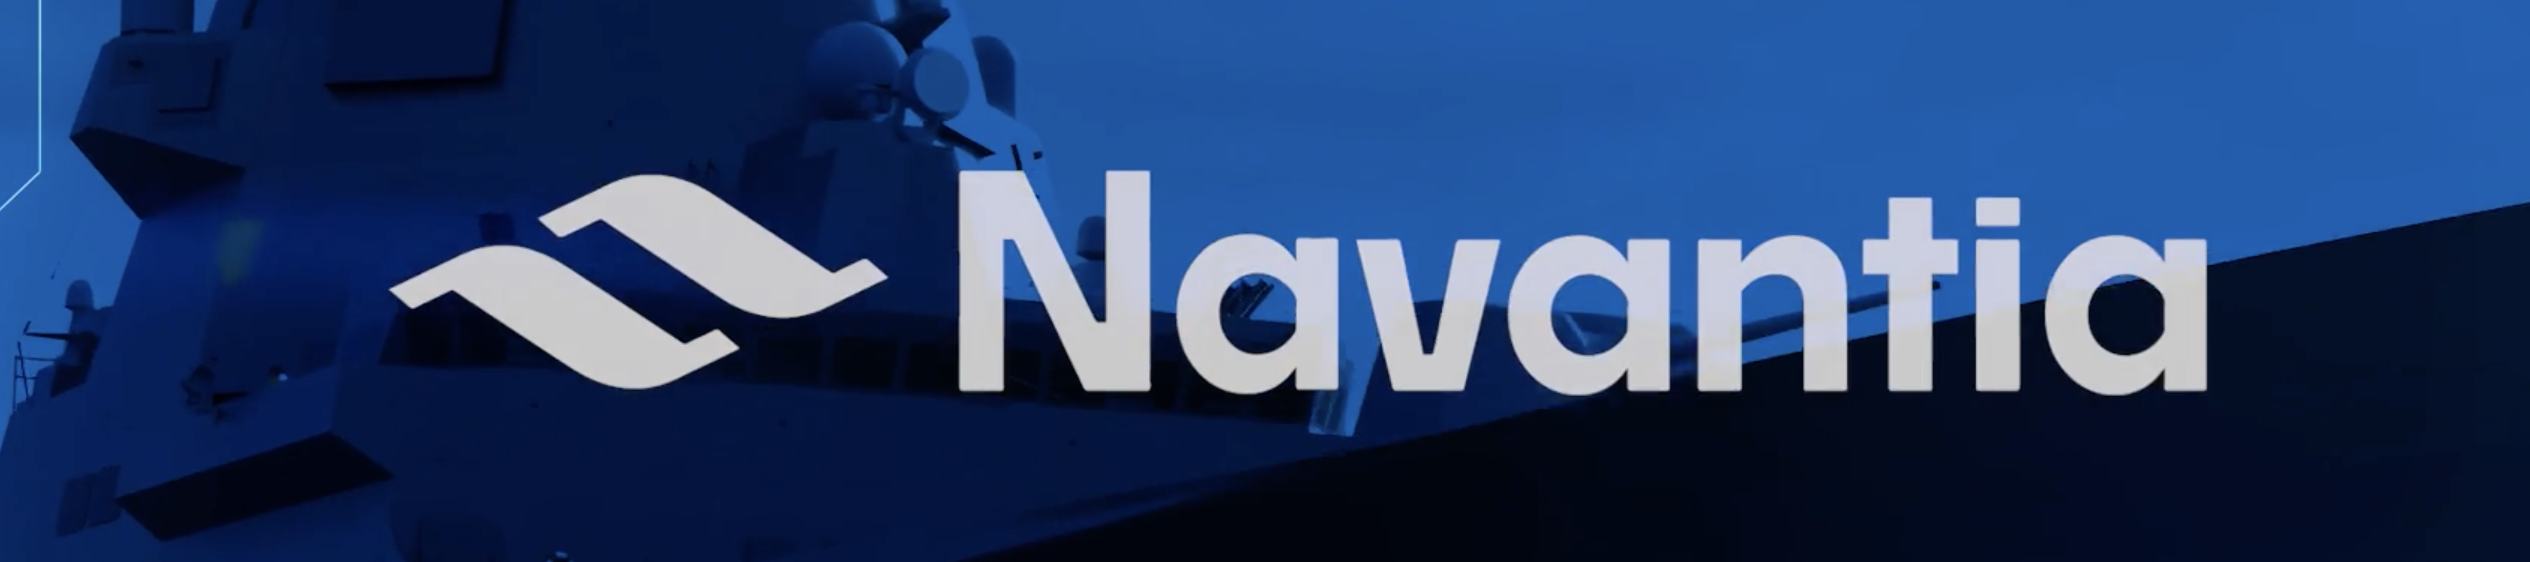

# **Yolo V8 Navantia Object Detection-- Baseline-- Capstone Project**

## **Set Up**


In [ ]:
!nvidia-smi

Sun Feb 12 13:10:44 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P0    26W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install Yolo v8 method

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.4/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
#ClearML Connection
!pip install clearml
#API connection 
%env CLEARML_WEB_HOST=https://app.clear.ml
%env CLEARML_API_HOST=https://api.clear.ml
%env CLEARML_FILES_HOST=https://files.clear.ml
%env CLEARML_API_ACCESS_KEY=N3JIHGE3VI5AP1468IJ4
%env CLEARML_API_SECRET_KEY=dkC6UzWUvqGHDfQM44cOcAjI7DZfgRhD214vjGjij8qh1Fduiz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 967.7/967.7 KB 38.1 MB/s eta 0:00:00
env: CLEARML_WEB_HOST=https://app.clear.ml
env: CLEARML_API_HOST=https://api.clear.ml
env: CLEARML_FILES_HOST=https://files.clear.ml
env: CLEARML_API_ACCESS_KEY=N3JIHGE3VI5AP1468IJ4
env: CLEARML_API_SECRET_KEY=dkC6UzWUvqGHDfQM44cOcAjI7DZfgRhD214vjGjij8qh1Fduiz


## **Dataset input**

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="Ny3g4ZIR8JLlIGGc8uX6")
project = rf.workspace("capstone-project-ie").project("capstone-nv")
dataset = project.version(6).download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.0/49.0 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Capstone-NV-6 in yolov8:: 100%|██████████| 6824/6824 [00:02<00:00, 3033.41it/s]


## **Model Training**

We create our baseline model with the default parameters just adjusting the image size with the main objective to improve the model performance. 

25 epochs

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8l.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 83.7M/83.7M [00:08<00:00, 10.4MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8l.yaml, data=/content/datasets/Capstone-NV-6/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=Fa

As we can see in the summary table the baseline model with the default parameters of the Yolo model gave us good results with a MAP50 of 92.3 and a recall of 88%. Moreover we see the same behaivor as in the Yolov5 and Yolo v8 model, cruises is the class with better results while we have opportunities in submarine but we still have good results. 

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    train_batch2.jpg
confusion_matrix.png				    train_batch930.jpg
events.out.tfevents.1676207586.fb0b3f2bf2eb.1165.0  train_batch931.jpg
F1_curve.png					    train_batch932.jpg
P_curve.png					    val_batch0_labels.jpg
PR_curve.png					    val_batch0_pred.jpg
R_curve.png					    val_batch1_labels.jpg
results.csv					    val_batch1_pred.jpg
results.png					    val_batch2_labels.jpg
train_batch0.jpg				    val_batch2_pred.jpg
train_batch1.jpg				    weights


## **Results**

/content


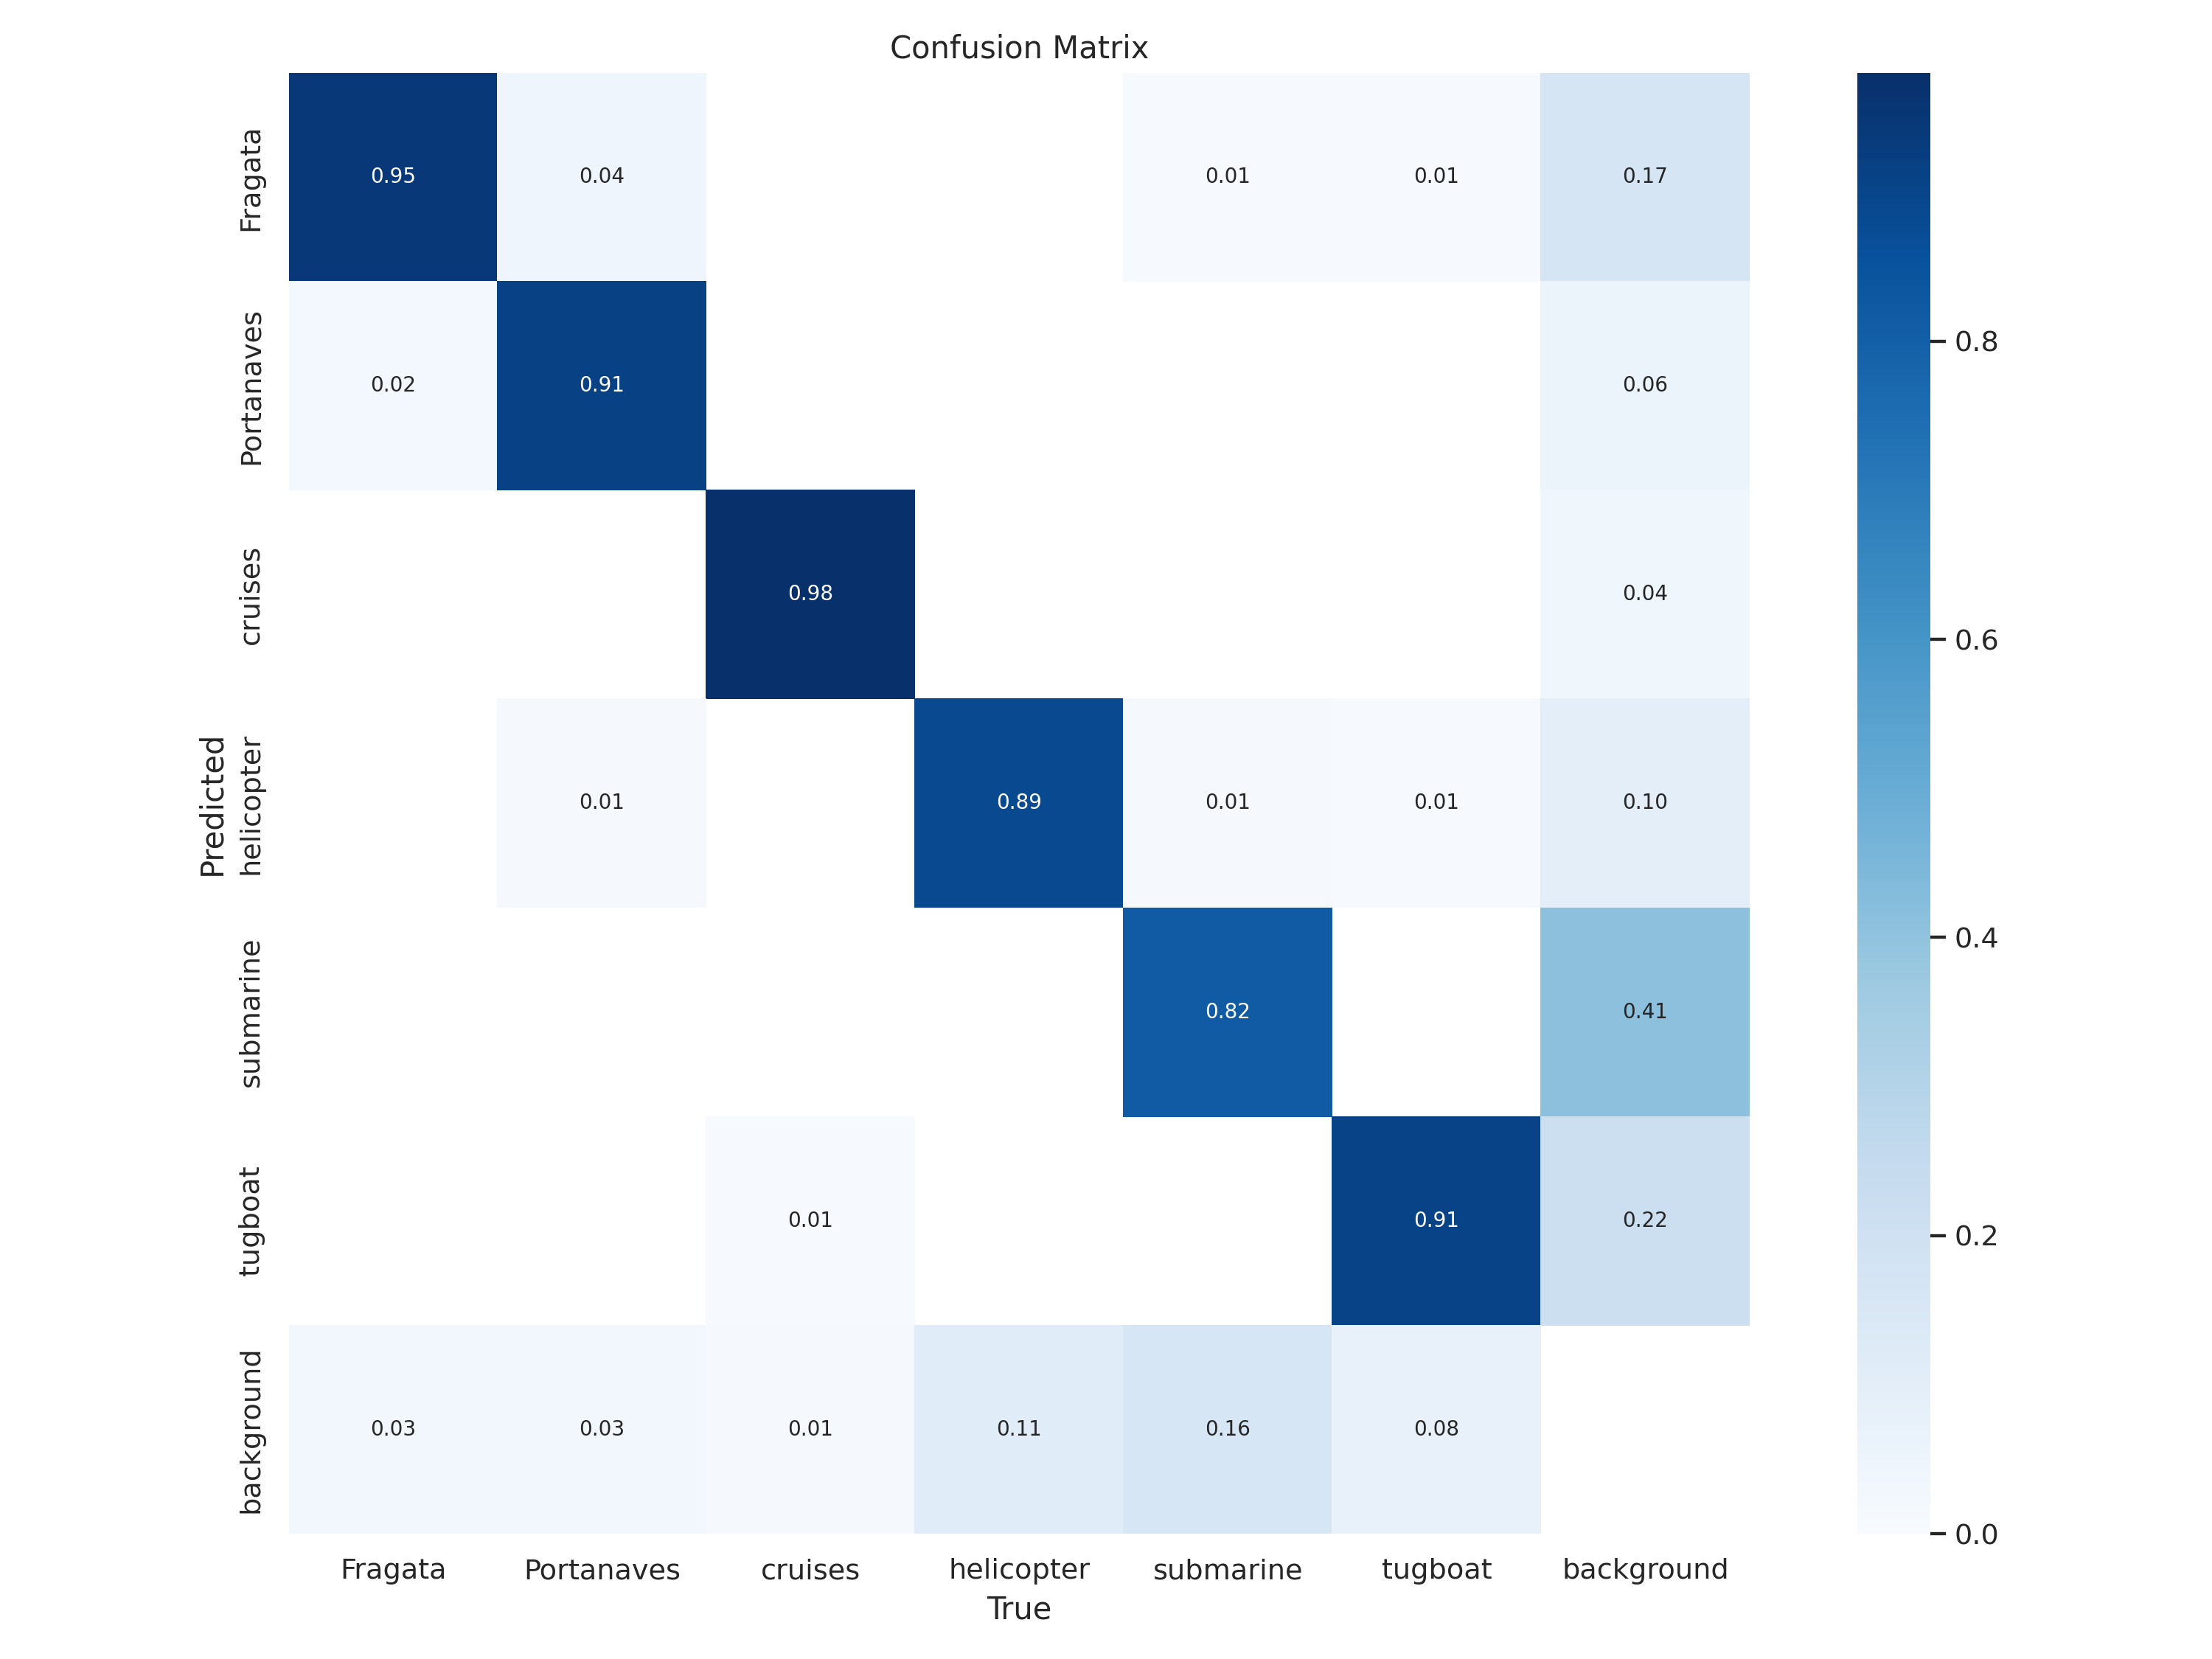

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


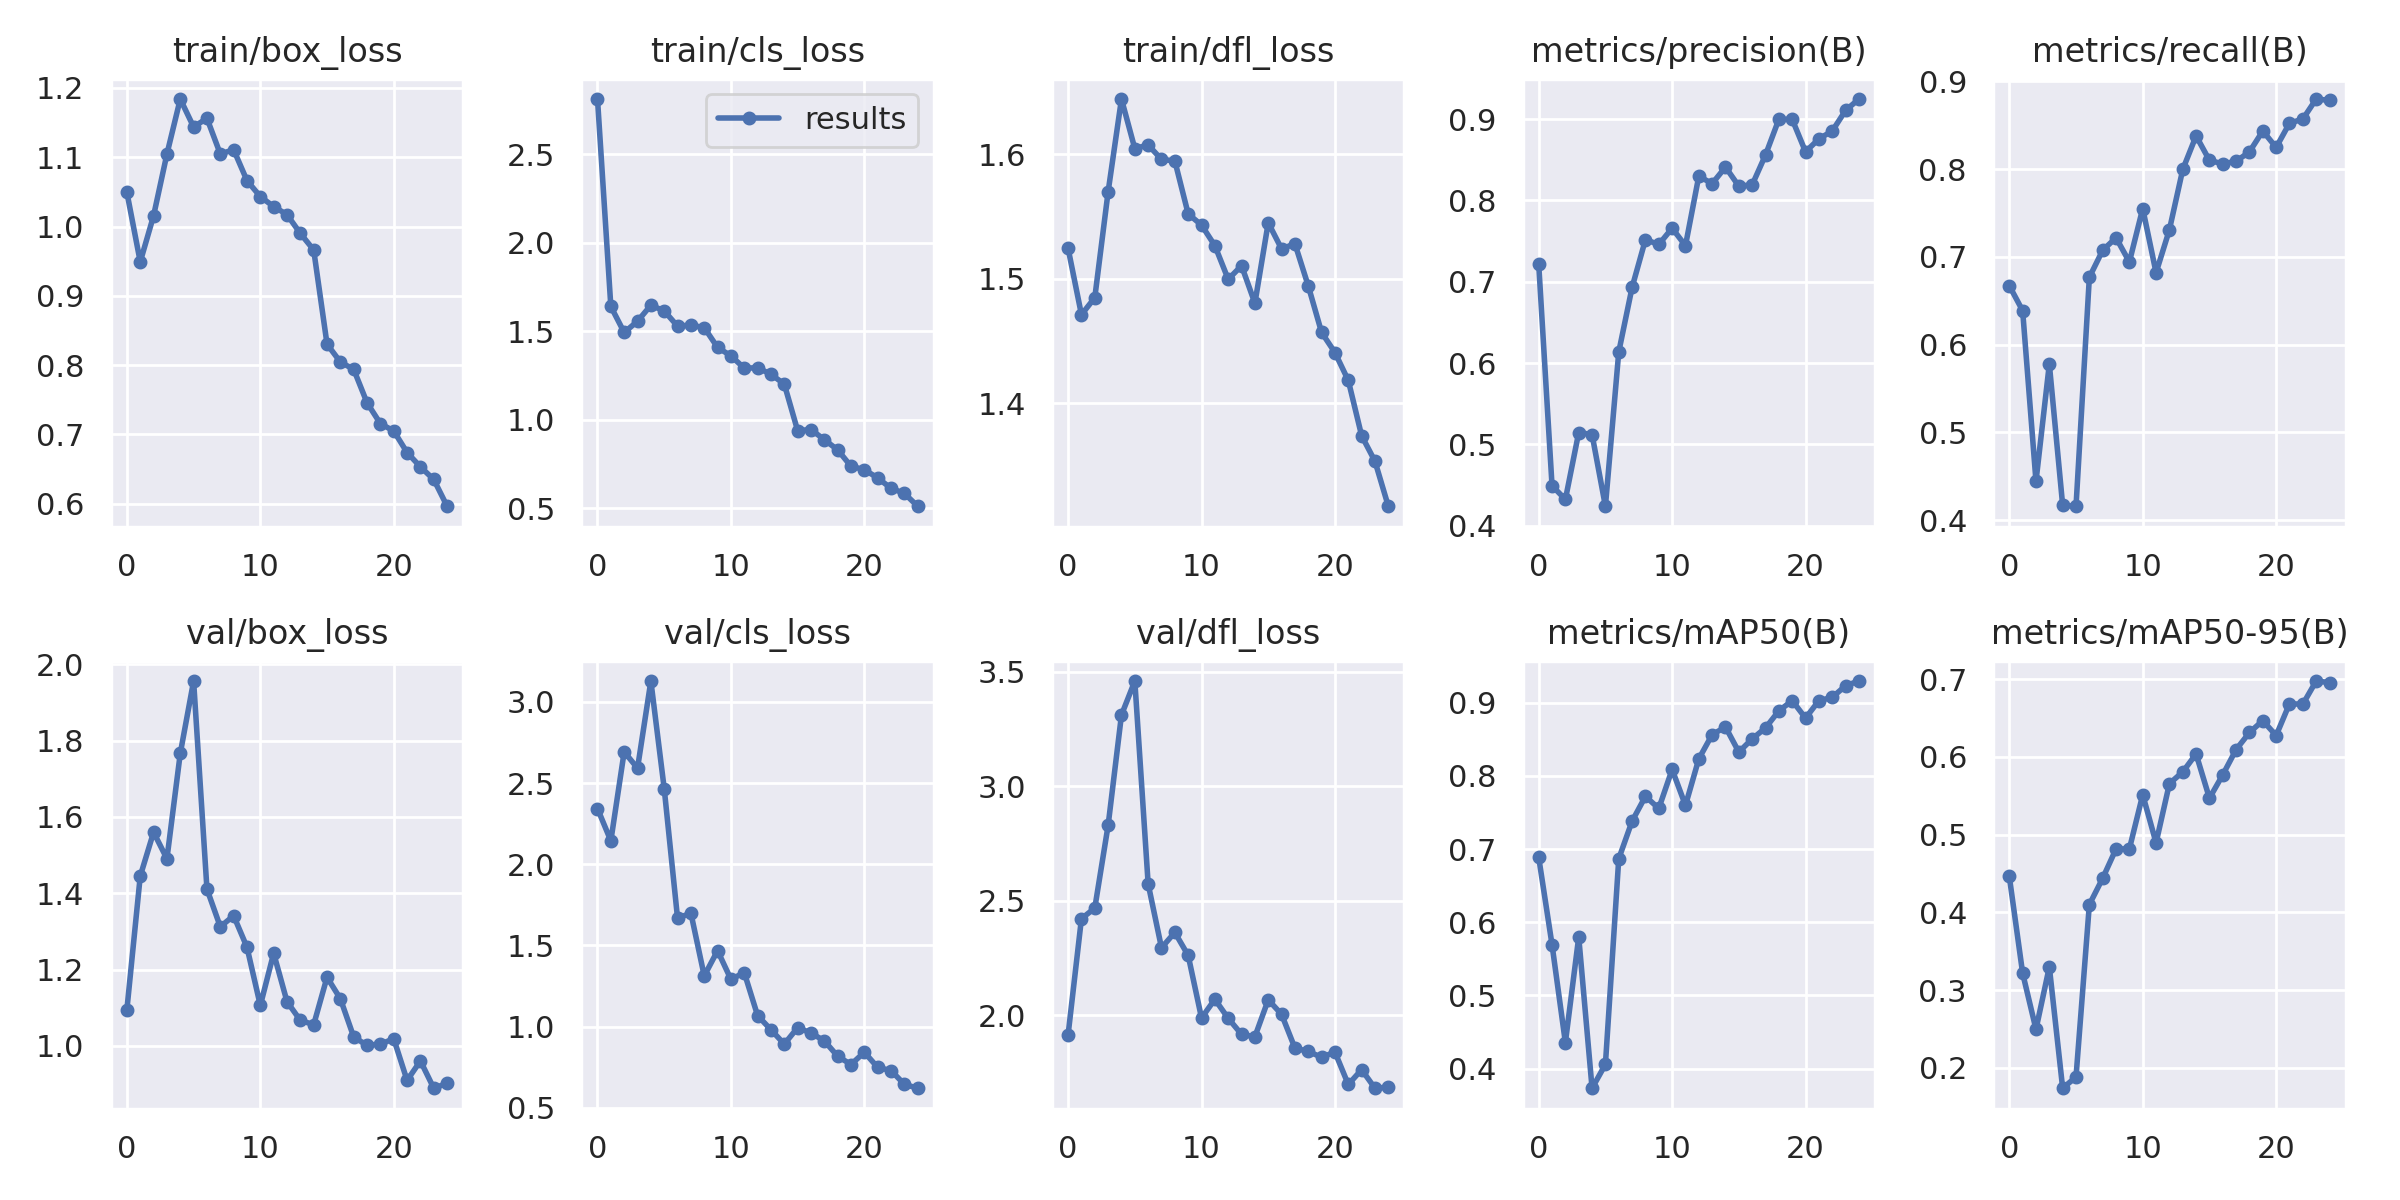

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


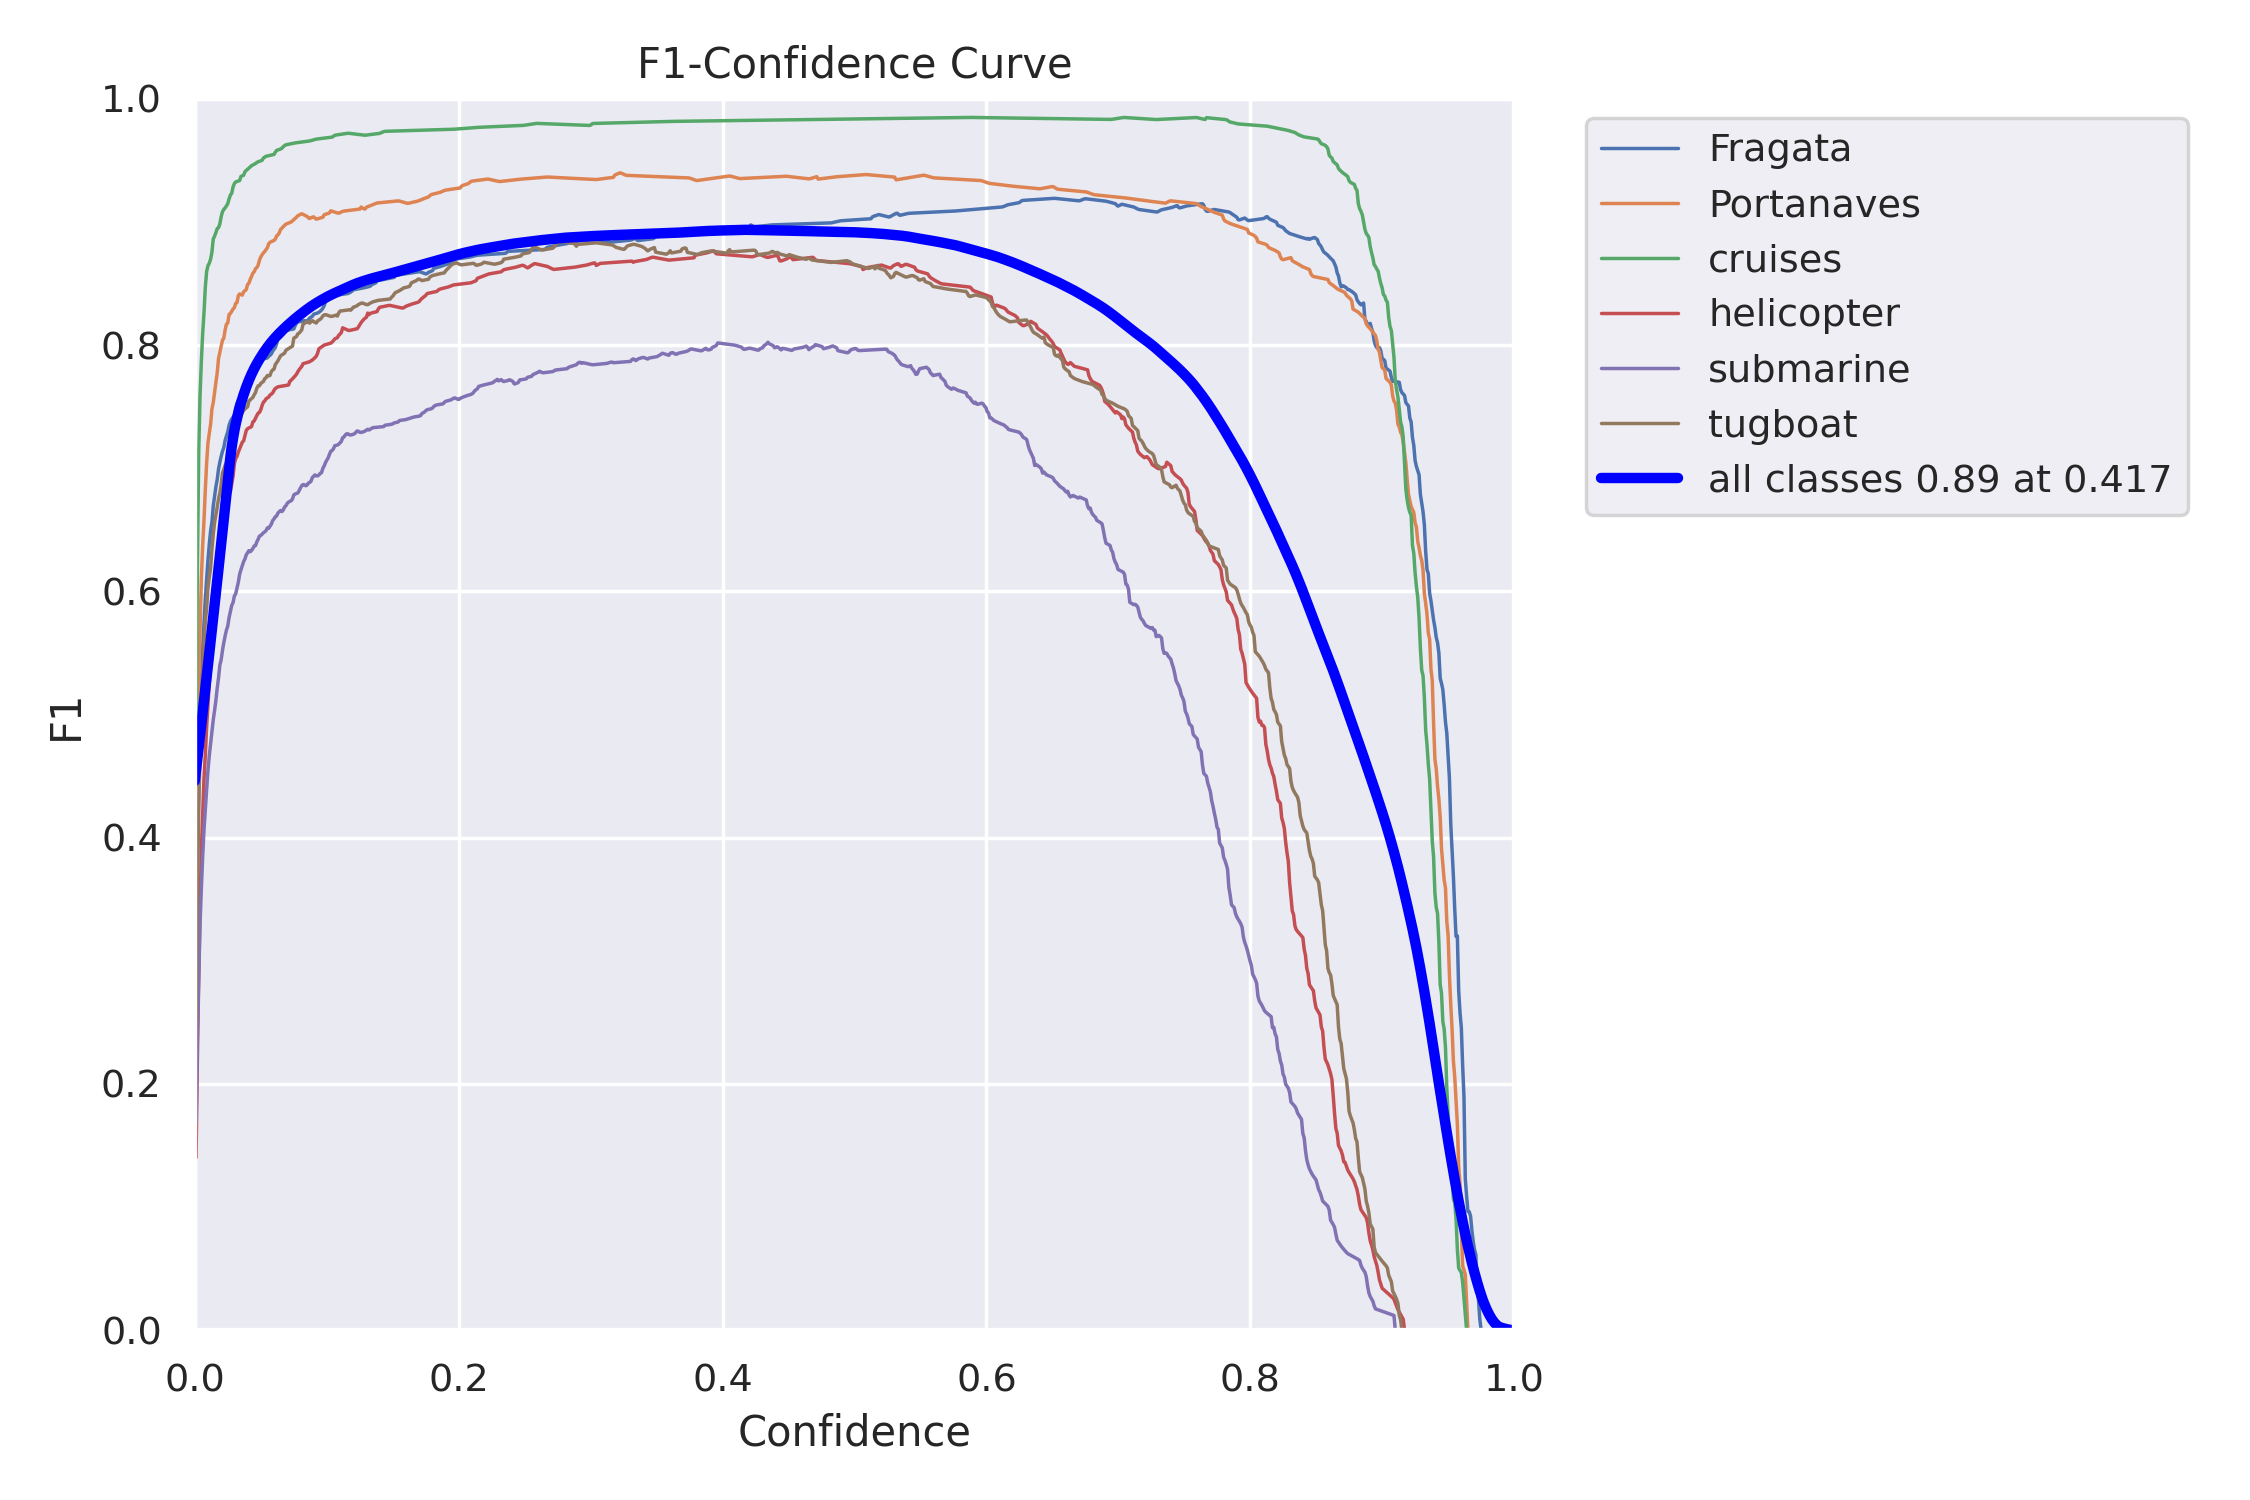

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/F1_curve.png', width=600)

/content


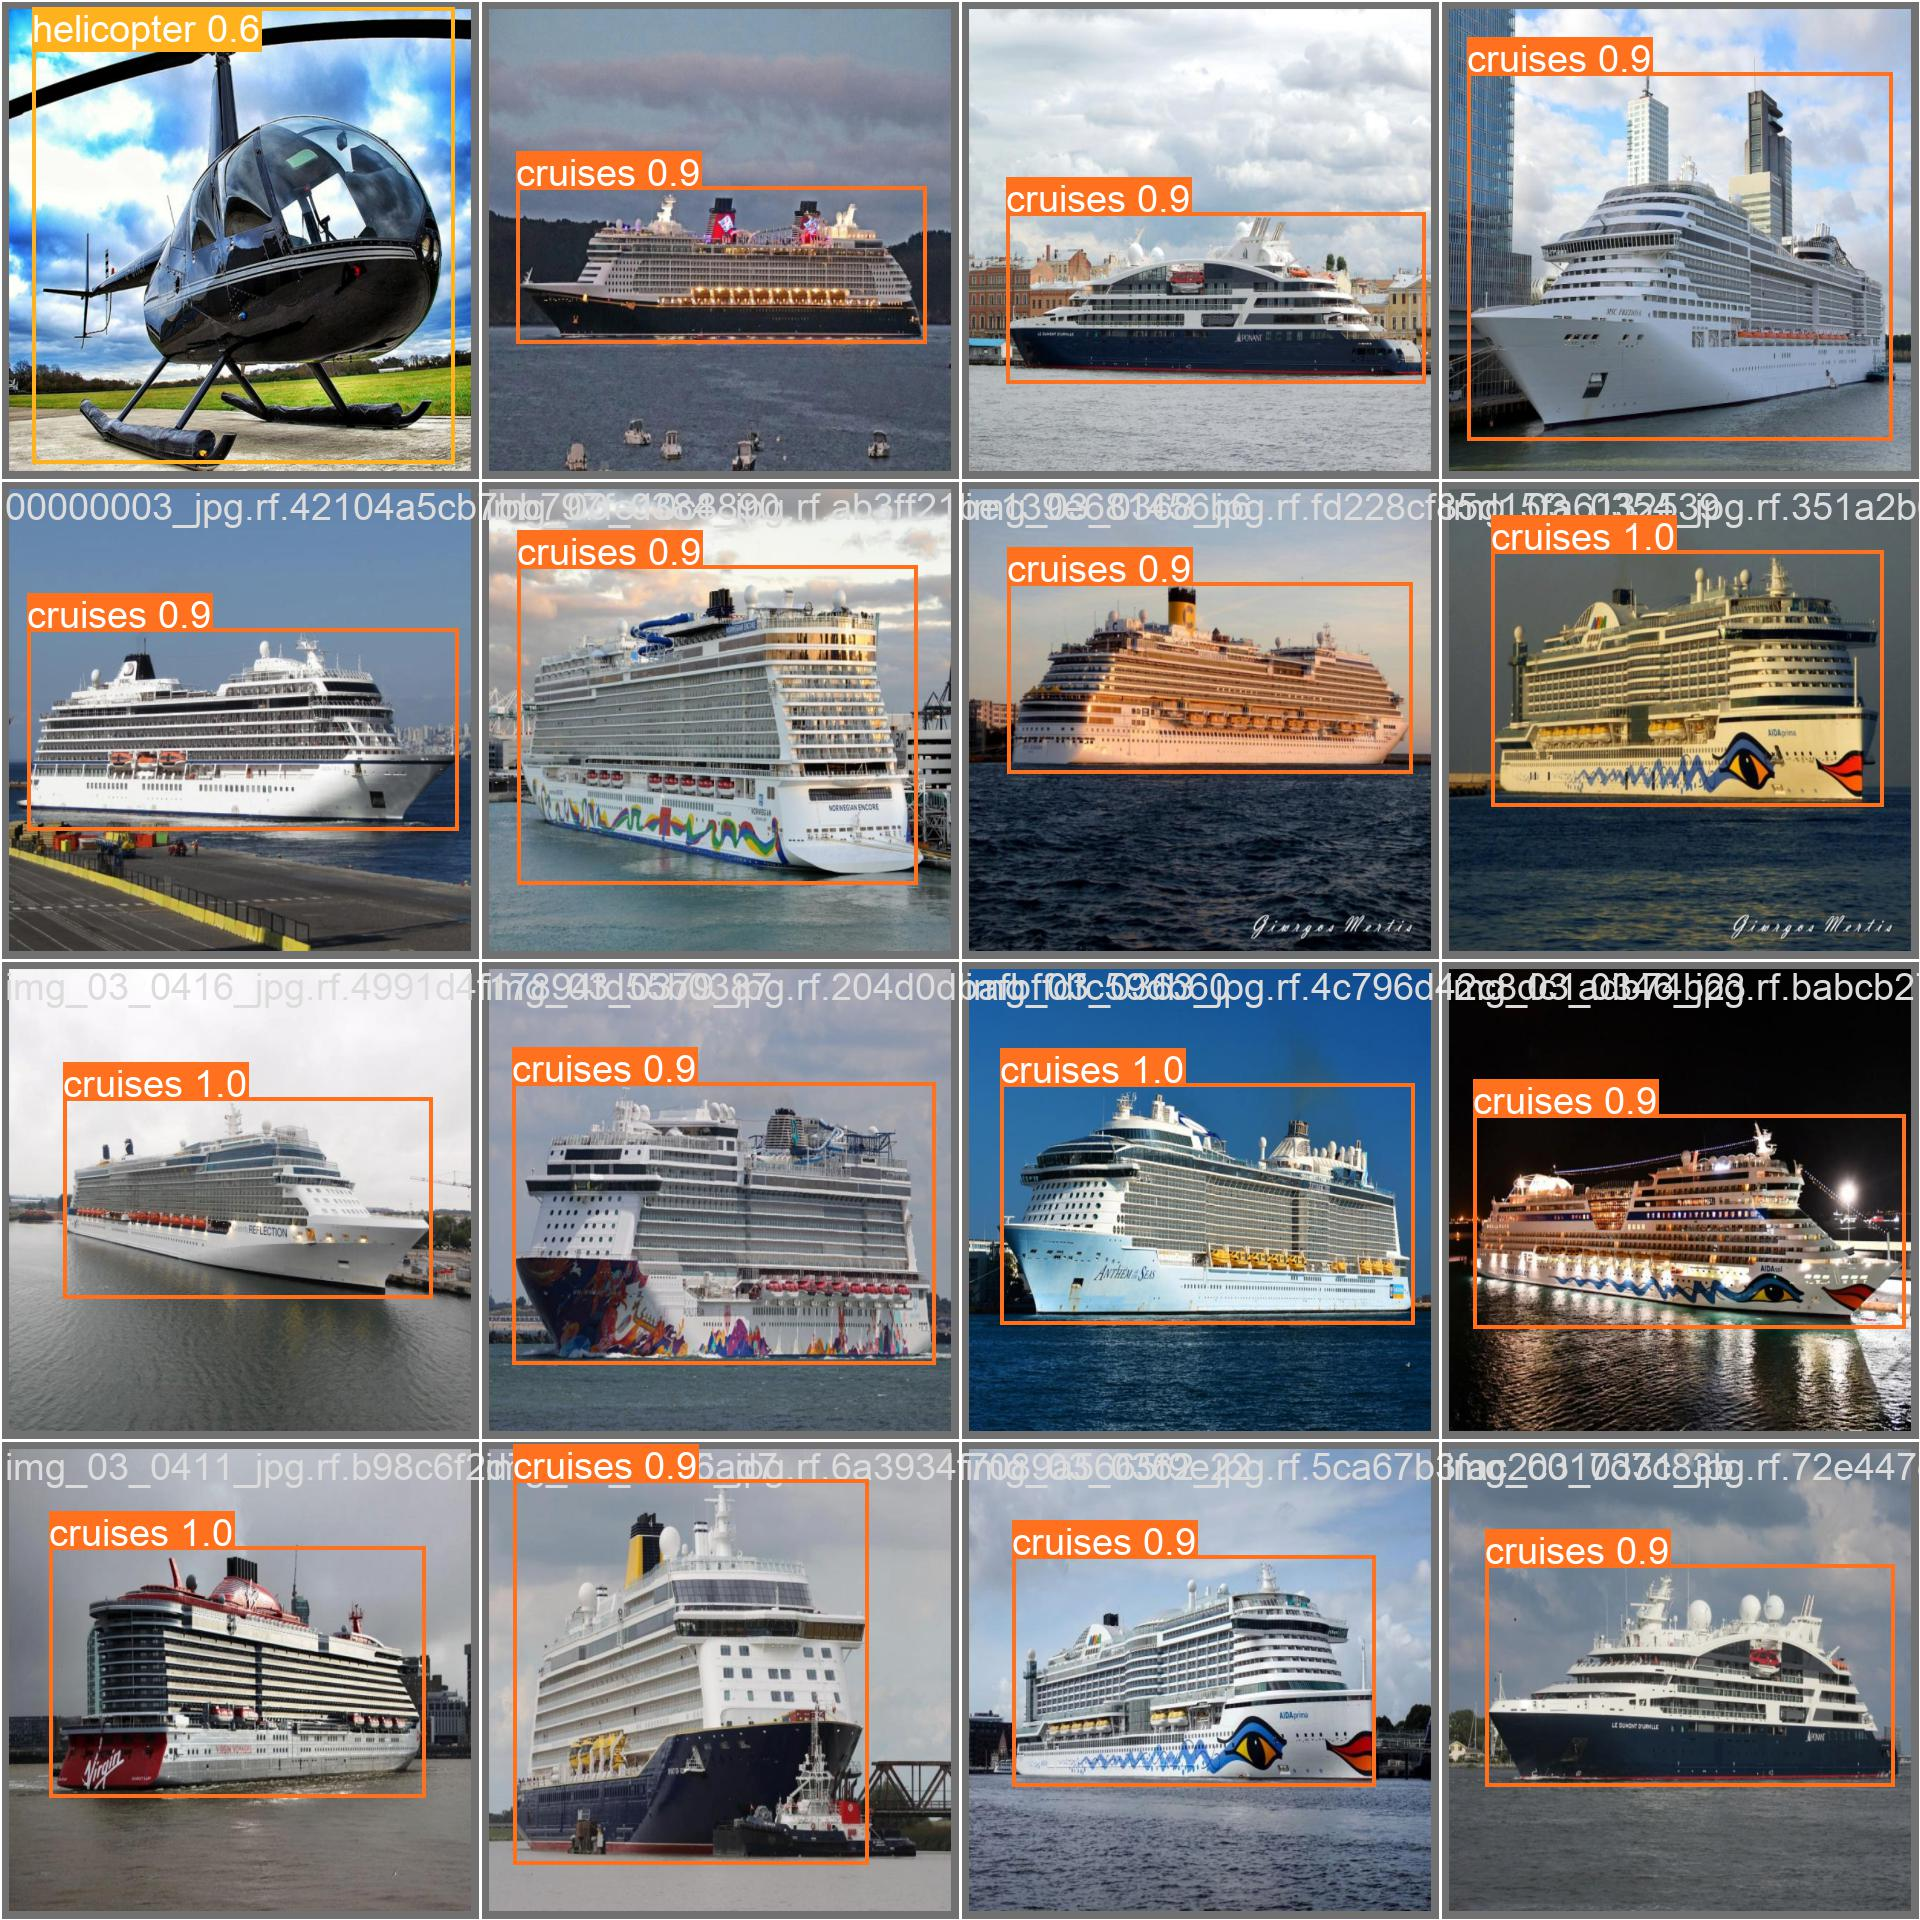

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## **Model Validation** 

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 268 layers, 43611234 parameters, 0 gradients, 164.8 GFLOPs
val: Scanning /content/datasets/Capstone-NV-6/valid/labels.cache... 1611 images, 0 backgrounds, 0 corrupt: 100% 1611/1611 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 101/101 [01:43<00:00,  1.02s/it]
                   all       1611       1687       0.91      0.879      0.923      0.697
               Fragata       1611        256      0.858      0.941      0.941      0.784
            Portanaves       1611        254      0.965      0.909      0.967      0.833
               cruises       1611        299      0.982      0.983      0.991      0.888
            helicopter       1611        231      0.896      0.848      0.874      0.548
             submarine       1611        342      0.844      0.757      0.826      0.459
               tugboa

## **Inference with Baseline Model**

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 268 layers, 43611234 parameters, 0 gradients, 164.8 GFLOPs
image 1/807 /content/datasets/Capstone-NV-6/test/images/00000013_jpg.rf.105c0deabe145c6222d99e4376dabe0d.jpg: 800x800 1 helicopter, 113.6ms
image 2/807 /content/datasets/Capstone-NV-6/test/images/00000030_jpg.rf.12c72571e1ad46f018beaa054b2e7b24.jpg: 800x800 1 helicopter, 76.4ms
image 3/807 /content/datasets/Capstone-NV-6/test/images/00000080_jpg.rf.bb7f701c1a632f4bef5b384a230ce8c5.jpg: 800x800 1 helicopter, 66.4ms
image 4/807 /content/datasets/Capstone-NV-6/test/images/00000088_jpg.rf.e7b5dcd357127aeb61fc762e56dcda70.jpg: 800x800 1 helicopter, 64.8ms
image 5/807 /content/datasets/Capstone-NV-6/test/images/00000094_png.rf.7d11aeeab7629296a13c8f6c12edbe7c.jpg: 800x800 1 helicopter, 64.8ms
image 6/807 /content/datasets/Capstone-NV-6/test/images/00000099_jpg.rf.73e6670c02a31b329a22de2bdea910ce.jpg: 800x800 1 helico

**NOTE:** Let's take a look at few results.

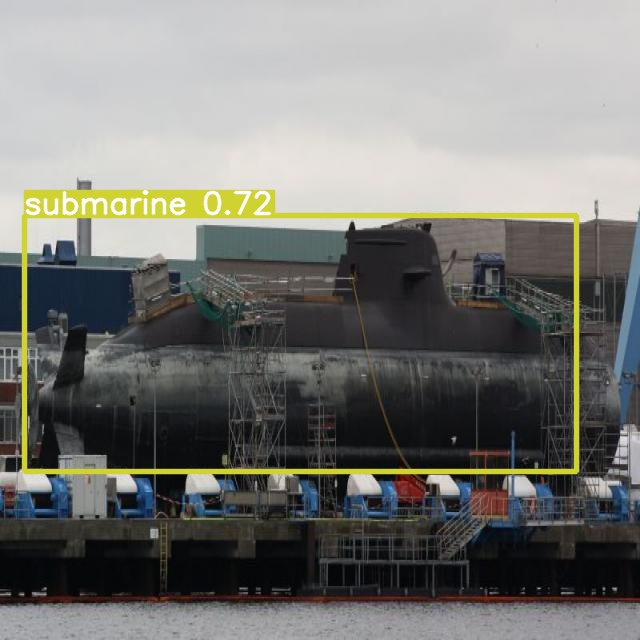

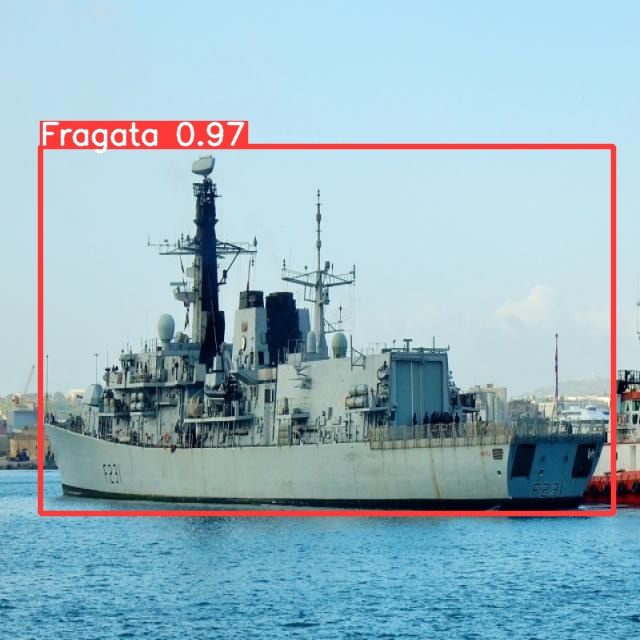

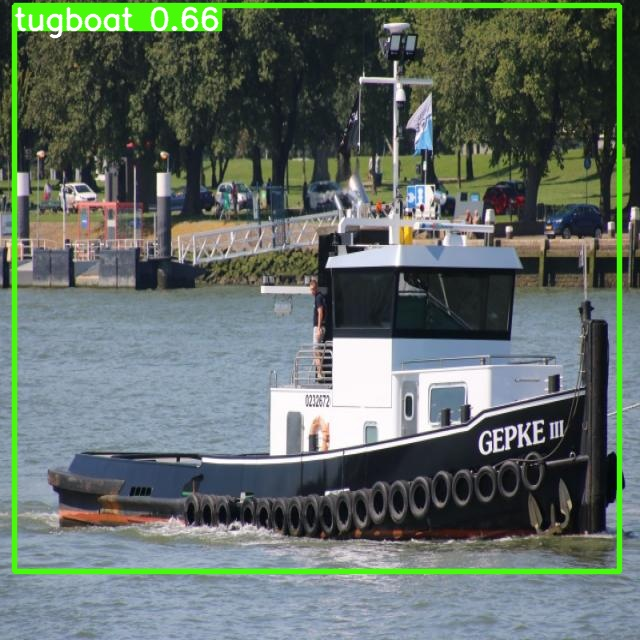

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

## **Deploy Model Roboflow**

We uploaded our model weights to Roboflow Deploy to use our trained weights on the platform.

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

View the status of your deployment at: https://app.roboflow.com/capstone-project-ie/capstone-nv/deploy/6
Share your model with the world at: https://universe.roboflow.com/capstone-project-ie/capstone-nv/model/6


## **Save Model**

In [ ]:
!zip -r runs.zip /content/runs

from google.colab import files
files.download("/content/runs.zip")

updating: content/runs/ (stored 0%)
updating: content/runs/detect/ (stored 0%)
updating: content/runs/detect/train/ (stored 0%)
updating: content/runs/detect/train/roboflow_deploy.zip (stored 0%)
updating: content/runs/detect/train/train_batch1.jpg (deflated 7%)
updating: content/runs/detect/train/R_curve.png (deflated 6%)
updating: content/runs/detect/train/state_dict.pt (deflated 8%)
updating: content/runs/detect/train/events.out.tfevents.1676207586.fb0b3f2bf2eb.1165.0 (deflated 71%)
updating: content/runs/detect/train/val_batch1_labels.jpg (deflated 8%)
updating: content/runs/detect/train/train_batch932.jpg (deflated 13%)
updating: content/runs/detect/train/val_batch2_labels.jpg (deflated 8%)
updating: content/runs/detect/train/weights/ (stored 0%)
updating: content/runs/detect/train/weights/last.pt (deflated 8%)
updating: content/runs/detect/train/weights/best.pt (deflated 8%)
updating: content/runs/detect/train/train_batch0.jpg (deflated 4%)
updating: content/runs/detect/train/val

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>